## PAN Card Tampering Detection

The purpose of this is project is to detect tampering of PAN card using computer vision. This project will help different organization in detecting whether the id i.e the PAN card provided to them by their employee or customers is original or not

**Note:** For this project we will calculate structural similarity of original PAN card and the PAN card uploaded by the user

In [1]:
# import the necessary libraries
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
# make directory
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [3]:
# Open image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw) 

### Loading original and user provided images

In [4]:
# file format of the source file
print("Original image format: ", original.format)
print("Tampered image format: ", tampered.format)

# image size in pixels. The size is always given as a 2D-tuple (width, height)
print("Original image size: ", original.size)
print("Tampered image size: ", tampered.size)


Original image format:  JPEG
Tampered image format:  PNG
Original image size:  (1200, 800)
Tampered image size:  (282, 179)


### Converting the format and size of tampered image similar to original image

In [5]:
# resize image
original = original.resize((250, 160))
print(original.size)

tampered = tampered.resize((250, 160))
print(tampered.size)

# save image
original.save('/content/pan_card_tampering/image/original.png')
tampered.save('/content/pan_card_tampering/image/tampered.png')

(250, 160)
(250, 160)


**Note:** If needed we can change the image format from `png` to `jpg` 

By doing the following:

```
tampered = Image.open('/content/pan_card_tampering/image/tampered.png')

tampered.save('/content/pan_card_tampering/image/tampered.jpg')
```

### Displaying the images


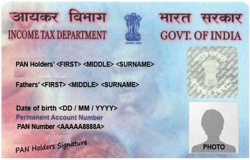

In [6]:
# display original image
original

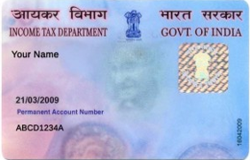

In [7]:
# display tampered image
tampered

### Loading and reading the images 


In [9]:
# load input images 
original = cv2.imread('/content/pan_card_tampering/image/original.png')
tampered = cv2.imread('/content/pan_card_tampering/image/tampered.png')

In [10]:
# convert to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

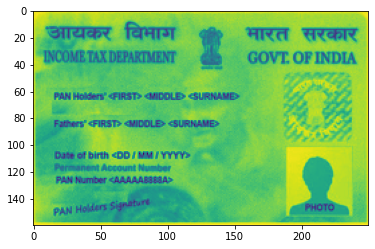

In [19]:
plt.imshow(original_gray)

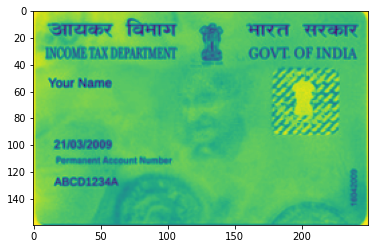

In [20]:
plt.imshow(tampered_gray)

**Note:** Converting image into grayscale helps because in image processing many applicatons does not help us in identifying the important edges of the coloured images also coloured images are bit complex to understand by machine because they have 3 channels while grayscale has only 1 channel

In [21]:
# compute structural similarity index (SSIM) between two images, ensuring that the diffrence is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM {}".format(score))

SSIM 0.31678790332739426


**Note:**  Structural similarity index helps us to determine exactly where in terms of `(x, y)` coordinates location, the image differences are. Here we are trying to find similarities between `original` and `tampered` image. Lower the SSIM socre, lower is the similarity

In [22]:
# calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

**Note:** 
* Here we are using the `threshold` functions of openCV which applies an adaptive thresholding to the image which is stored in form of an array. This function transforms the `grayscale` image into a binary image using a mathematical formula. 

* Find contours works on binary image and retrieves the contours. These contours are a useful tool for shape analysis and recognition.imutils

* Grab contours grabs the apprpriate value of the contours


In [23]:
# loop over contours
for c in cnts:
  # applying contours on the image
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

**Note:** 
* Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. 

* We compute the bounding box of the contour and then draw teh bounding box on both images to represent whether the two images are different. 

Original Format Image


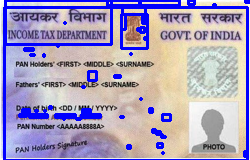

In [25]:
# display original image with contour
print("Original Format Image")
Image.fromarray(original)

Tampered Format Image


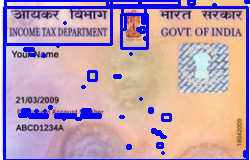

In [26]:
# display tampered image with contour
print("Tampered Format Image")
Image.fromarray(tampered)

Difference


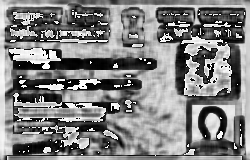

In [28]:
# diplay difference between the images
print("Difference")
Image.fromarray(diff)

Threshold Image


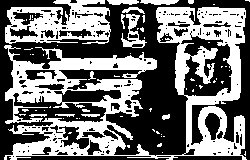

In [29]:
# display threshold image with white
print("Threshold Image")
Image.fromarray(thresh)

### Summary

1. Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition. 

2. As, our SSIM is ~31.2% we can say that the image user provided is fake or tampered.

3. Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.  

### Scope
This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID like adhar, voter id, etc.